# Анализ модели

In [118]:
import math
import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [123]:
import physics as ph
from Sun import SSM18 as s

In [124]:
def load_model(epoch):
#     filename = 'FromCenter/1epoch%.02d.csv' % epoch
    filename = 'Mass/1epoch%.02d.csv' % epoch
    return pd.read_csv(filename)

In [125]:
epoch = 1
df = load_model(epoch)

In [126]:
df

,Unnamed: 0,Mass,Radius,Temperature,Density,Luminosity,Hydrogen,Opacity,Pressure,Velocity
0,0,0.000000e+00,0.000000e+00,1.333001e+07,97.803512,0.000000e+00,0.732,1.363641,1.714126e+17,8.193610e-11
1,1,1.989737e+30,1.693612e+09,1.323295e+07,96.440164,2.118275e+31,0.732,1.382854,1.680836e+17,7.855001e-11
2,2,3.979475e+30,2.138833e+09,1.317560e+07,95.621566,4.168782e+31,0.732,1.393512,1.661002e+17,7.659580e-11
3,3,5.969212e+30,2.452599e+09,1.312752e+07,94.930029,6.174973e+31,0.732,1.402074,1.644321e+17,7.498516e-11
4,4,7.958950e+30,2.703417e+09,1.308464e+07,94.309685,8.143610e+31,0.732,1.409427,1.629413e+17,7.357001e-11
...,...,...,...,...,...,...,...,...,...,...
996,996,1.981778e+33,5.406773e+10,8.884676e+05,0.065823,2.327360e+33,0.732,6.543722,8.028402e+12,2.817700e-22
997,997,1.983768e+33,5.487834e+10,7.779882e+05,0.053886,2.327360e+33,0.732,5.357065,5.755230e+12,5.645599e-23
998,998,1.985758e+33,5.583711e+10,6.475668e+05,0.040879,2.327360e+33,0.732,4.064002,3.634136e+12,6.124060e-24
999,999,1.987748e+33,5.705270e+10,4.769614e+05,0.025809,2.327360e+33,0.732,2.565833,1.689952e+12,1.512235e-25


In [127]:
x = df['Hydrogen'].values
r = df['Radius'].values
m = df['Mass'].values
t = df['Temperature'].values
d = df['Density'].values
l = df['Luminosity'].values
p = df['Pressure'].values
k = df['Opacity'].values
# c = df['Convection'].values

In [128]:
r1 = r/s.R
m1 = m/s.M

In [129]:
r1[-1], m1[-1]

(0.8459525959587898, 0.999868034426001)

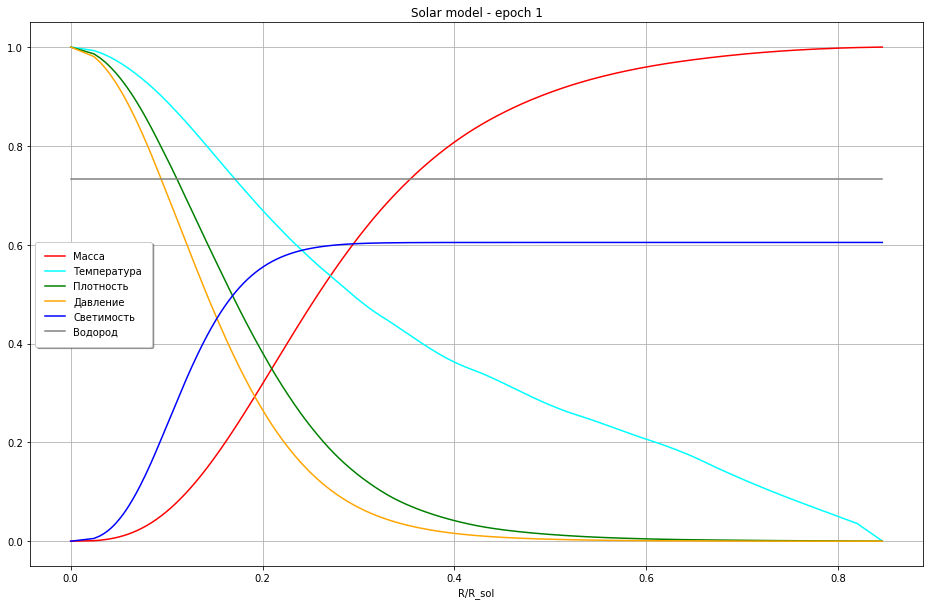

In [130]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
# plt.plot(r1, c, color='black', label='Convection')
plt.plot(r1, m/s.M, color='red', label='Масса')
plt.plot(r1, t/t[0], color='cyan', label='Температура')
# plt.plot(r1[1:], d1[1:]/d[0], color='green', label='Плотность')
plt.plot(r1, d/d[0], color='green', label='Плотность')
plt.plot(r1, p/p[0], color='orange', label='Давление')
plt.plot(r1, l/s.L, color='blue', label='Светимость')
plt.plot(r1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('R/R_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

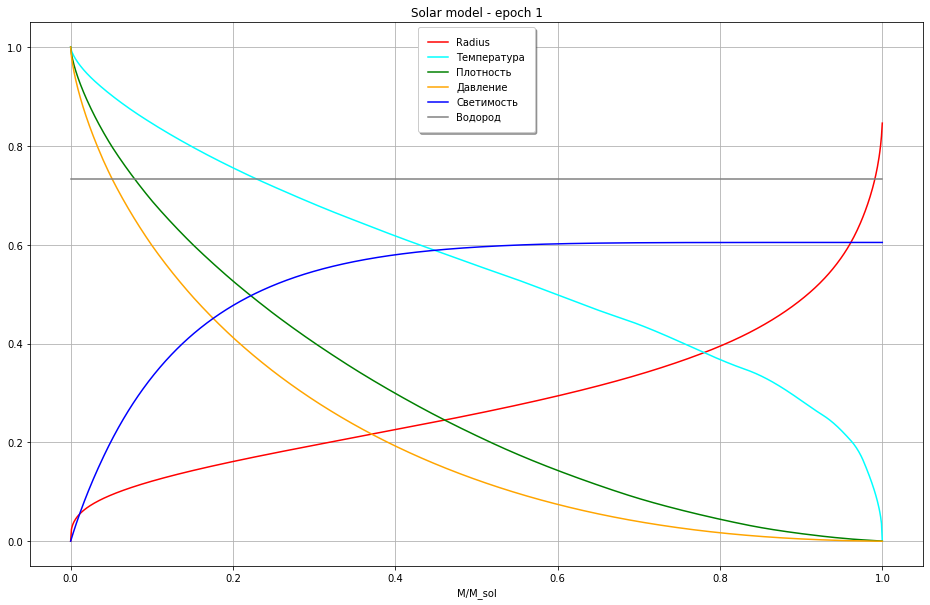

In [132]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
# plt.plot(m1, c, color='black', label='Convection')
plt.plot(m1, r1, color='red', label='Radius')
plt.plot(m1, t/t[0], color='cyan', label='Температура')
plt.plot(m1, d/d[0], color='green', label='Плотность')
plt.plot(m1, p/p[0], color='orange', label='Давление')
plt.plot(m1, l/s.L, color='blue', label='Светимость')
plt.plot(m1, x, color='gray', label='Водород')
# plt.plot(r1, p1/p1[0], color='black', marker='.', label='Давление')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

ValueError: x and y must have same first dimension, but have shapes (1001,) and (101,)

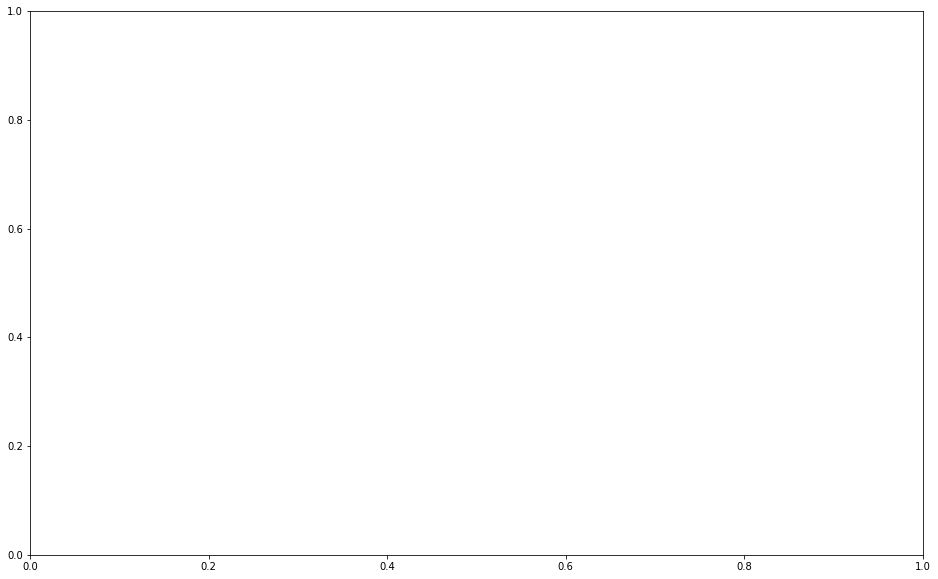

In [133]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
# plt.plot(r1, c[::10], color='black', label='Convection')
plt.plot(r1, k[::10], color='red', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

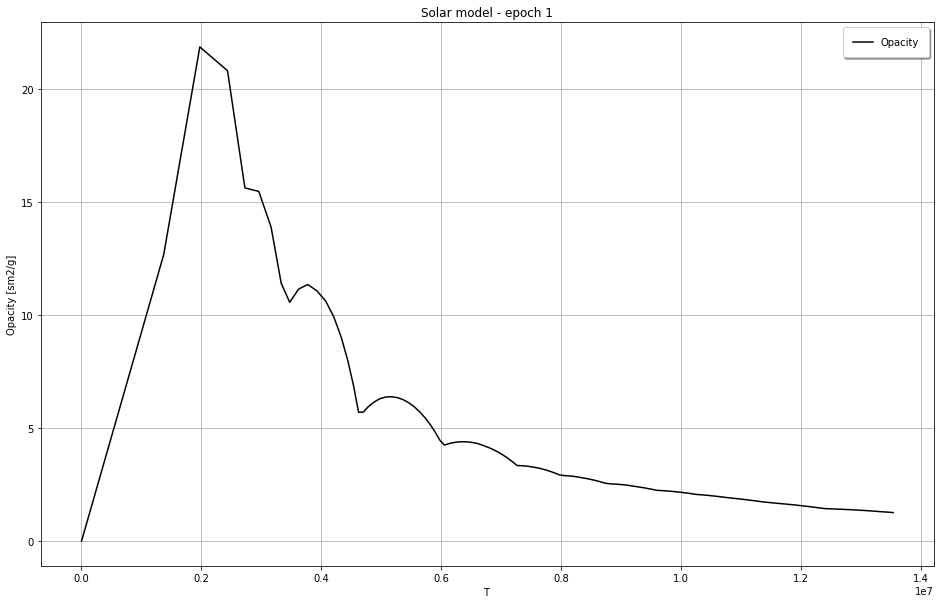

In [97]:
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(t[::10], k[::10], color='black', label='Opacity')
# plt.xlim(-0.1,0.1)
# plt.ylim(-0.1, 0.1)
plt.xlabel('T ')
plt.ylabel('Opacity [sm2/g]')
plt.title('Solar model - epoch %d' % epoch)
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

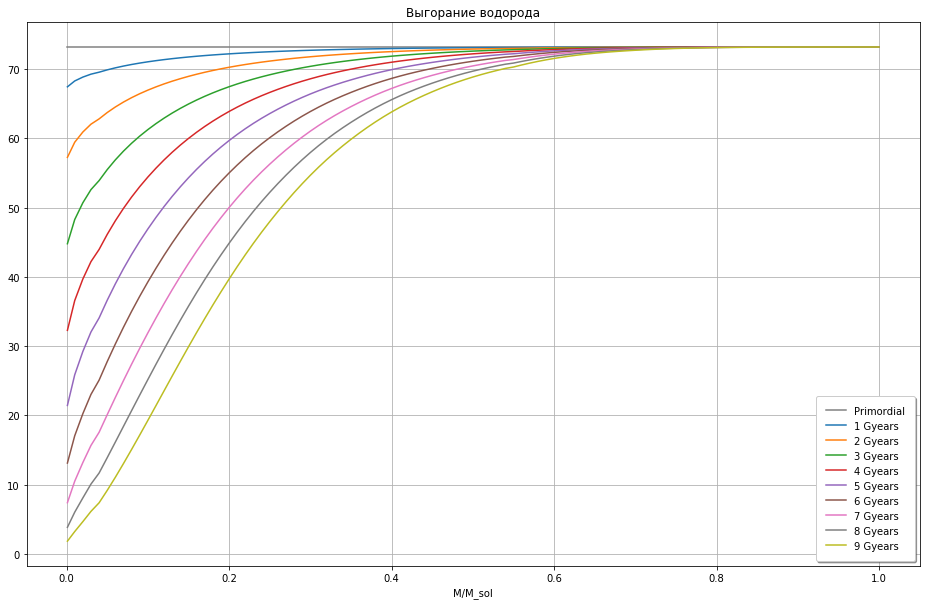

In [58]:
h = 100.*x[::10]
v = df['Velocity'].values[::10]
plt.figure(figsize=(16, 10))
ax = plt.axes()
plt.plot(m1, h, color='gray', label='Primordial')
for ep in range(1,10):
    h = h*np.exp(-1e9*v*ep)
    plt.plot(m1, h, label='%d Gyears' % ep)
plt.xlabel('M/M_sol')
plt.ylabel('')
plt.title('Выгорание водорода')
ax.grid(b=True, which='both')
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);